## Setup

In [2]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load data
dataset_path = '/kaggle/input/psychiatric-drug-webmd-reviews/'

reviews_file = dataset_path + 'psychiatric_drug_webmd_reviews.csv'
df = pd.read_csv(reviews_file, index_col=0)

col_descripts_file = dataset_path + 'column_descriptions.csv'
col_descripts = pd.read_csv(col_descripts_file)

drug_file = dataset_path + 'drug_list.csv'
drugs = pd.read_csv(drug_file)

In [4]:
# description of columns

from pandas import option_context
from IPython.display import display

with option_context('display.max_colwidth', None, 'display.colheader_justify', 'left'):
    to_display = col_descripts.style.set_properties(**{'text-align': 'left'})
    display(to_display)

,column_name,description
0,drug_name,Name of medication being reviewed
1,date,Date of review
2,age,"Age group of patient, selected from a dropdown list"
3,gender,"Gender of patient, selected from a dropdown list"
4,time_on_drug,"How long the medication has been taken, selected from a dropdown list"
5,reviewer_type,"The type of person reviewing, patient or caregiver"
6,condition,"The ""main reason for taking this medication,"" selected from a dropdown list"
7,rating_overall,"Overall rating for the drug, the average of rating_effectiveness, rating_ease_of_use, and rating_satisfaction, from 1 to 5"
8,rating_effectiveness,"Agreement with the statement ""This drug has worked for me,"" from 1 to 5 stars"
9,rating_ease_of_use,"Agreement with the statement ""This medication has been easy for me to use,"" from 1 to 5 stars"


In [40]:
# example of some of the records in the dataset
df.head(5)

,drug_name,date,age,gender,time_on_drug,reviewer_type,condition,rating_overall,rating_effectiveness,rating_ease_of_use,rating_satisfaction,text
0,Abilify Oral,12/11/2023,45-54,Female,1 to 6 months,Patient,Additional Medications to Treat Depression,1.0,1,1,1,Took routine for approximately 3-4 months. Ver...
1,Abilify Oral,12/6/2023,35-44,Female,1 to 6 months,Patient,Additional Medications to Treat Depression,5.0,5,5,5,I take this in conjunction with Pristiq and Bu...
2,Abilify Oral,11/12/2023,35-44,Female,less than 1 month,Patient,Additional Medications to Treat Depression,5.0,5,5,5,I started abilify two weeks ago for depression...
3,Abilify Oral,11/6/2023,19-24,Female,6 months to less than 1 year,Patient,Other,3.7,4,5,2,"Great for depression, but it made me have a co..."
4,Abilify Oral,10/2/2023,55-64,Female,1 to 6 months,Patient,Additional Medications to Treat Depression,5.0,5,5,5,I felt a positive affect of level headiness wi...


In [94]:
# medications included in the dataset and links to their reviews

with option_context('display.max_colwidth', None, 'display.colheader_justify', 'left'):
    to_display = drugs.style.set_properties(**{'text-align': 'left'})
    display(to_display)

,drug_name,url
0,Abilify Oral,https://reviews.webmd.com/drugs/drugreview-64439-abilify
1,Doxepin Oral,https://reviews.webmd.com/drugs/drugreview-8647-doxepin-hcl-concentrate
2,Clomipramine Oral,https://reviews.webmd.com/drugs/drugreview-1305-clomipramine-hcl
3,Aplenzin Oral,https://reviews.webmd.com/drugs/drugreview-151973-aplenzin
4,Asendin Oral,https://reviews.webmd.com/drugs/drugreview-6171-asendin-tablet
5,Aventyl Oral,https://reviews.webmd.com/drugs/drugreview-6172-aventyl-capsule
6,Brexpiprazole Oral,https://reviews.webmd.com/drugs/drugreview-169290-brexpiprazole-tablet
7,Caplyta Oral,https://reviews.webmd.com/drugs/drugreview-178621-caplyta
8,Citalopram Oral,https://reviews.webmd.com/drugs/drugreview-1701-citalopram-hbr
9,Cymbalta Oral,https://reviews.webmd.com/drugs/drugreview-91491-cymbalta


In [42]:
# possible values for reviewer type: patient, caregiver, or empty
for x in pd.unique(df['reviewer_type']):
    print(x)

Patient
Caregiver
nan


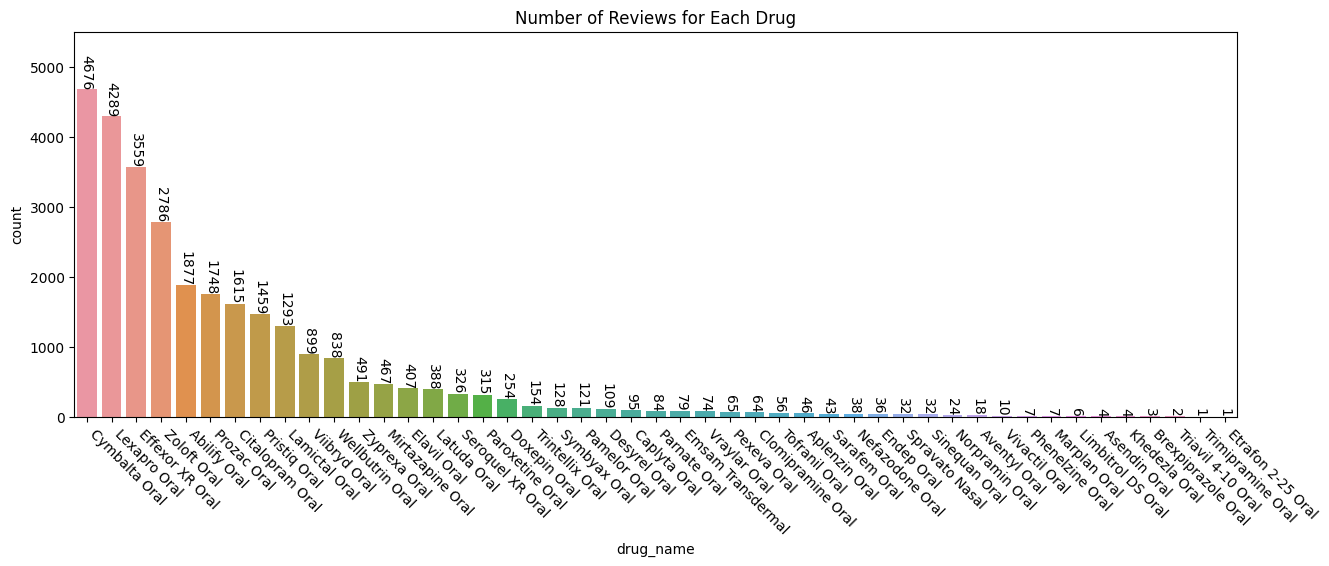

In [8]:
fig, ax = plt.subplots(figsize=(15, 5))
order = df['drug_name'].value_counts(ascending=False)
sns.countplot(df, x='drug_name', order=order.index)
plt.xticks(rotation=-45, ha='left')
ax.bar_label(container=ax.containers[0], labels=order, rotation=-90)
plt.title('Number of Reviews for Each Drug')
plt.ylim(0, 5500);

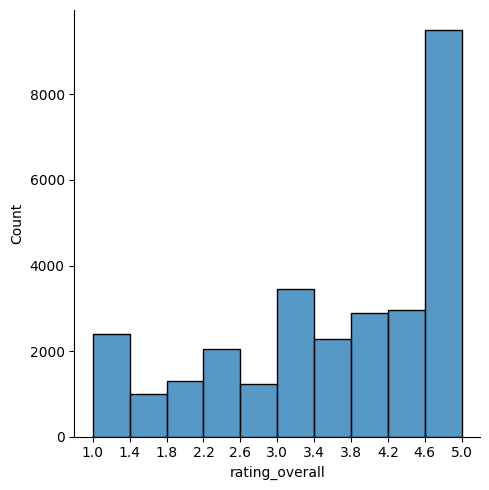

In [16]:
bins = 10
bin_width = (5-1)/bins
ax = sns.displot(df, x='rating_overall', bins=bins)
plt.xticks(np.arange(1, 5+bin_width, bin_width));

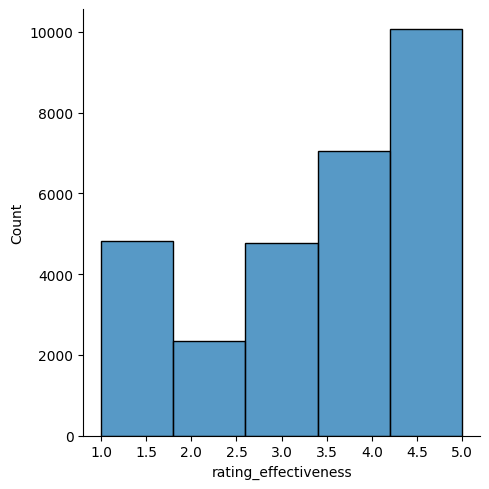

In [14]:
sns.displot(df, x='rating_effectiveness', bins=5);

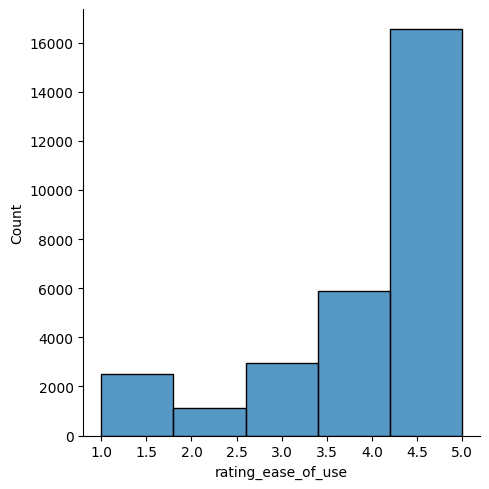

In [15]:
sns.displot(df, x='rating_ease_of_use', bins=5);

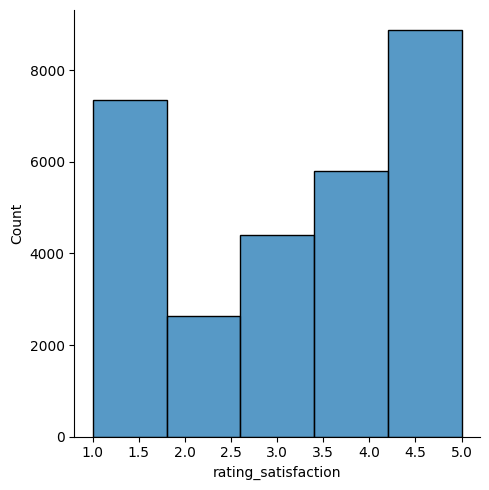

In [47]:
sns.displot(df, x='rating_satisfaction', bins=5)

<Axes: xlabel='age', ylabel='count'>

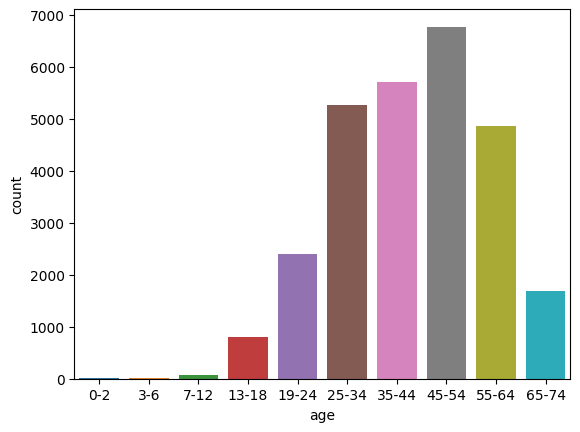

In [17]:
vals = np.array([x for x in pd.unique(df['age']) if type(x)==str])
first_numbers = [int(x.split('-')[0]) for x in vals]
order_inds = np.argsort(first_numbers)
order = vals[order_inds]
sns.countplot(df, x='age', order=order)

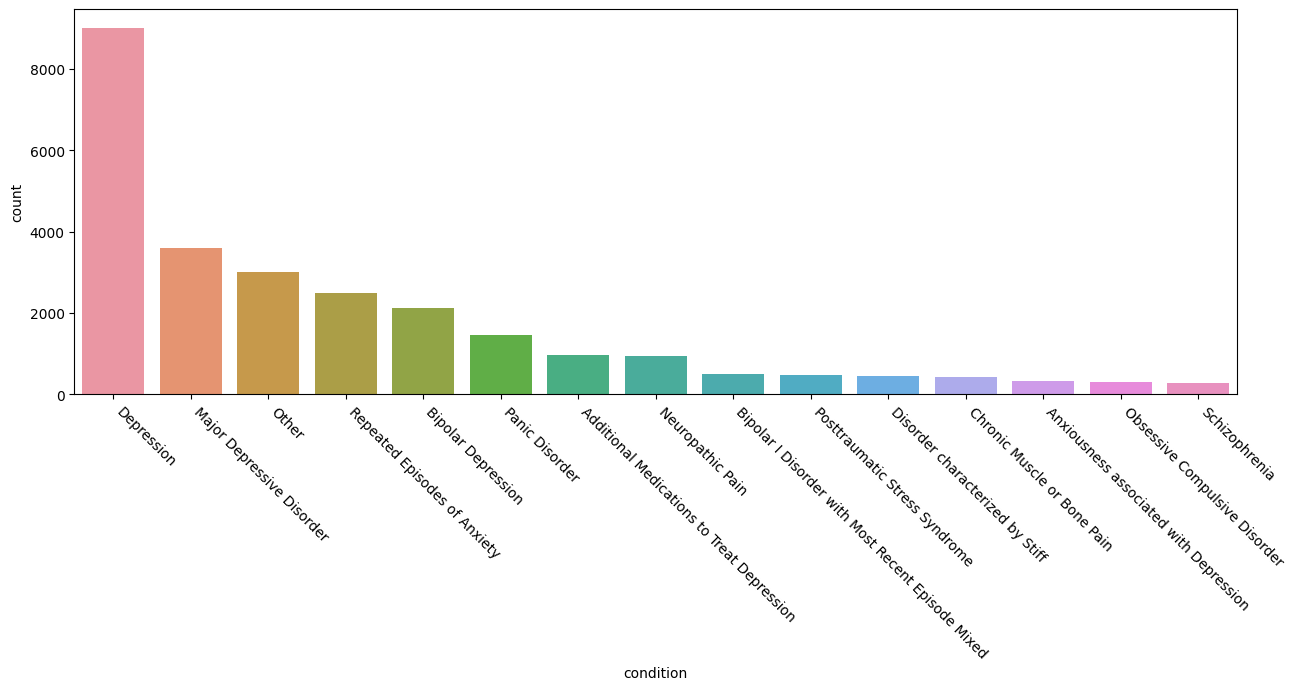

In [18]:
fig, ax = plt.subplots(figsize=(15, 5))
order = df['condition'].value_counts(ascending=False)
top_n = 15
top_conds = order[:top_n].index
sns.countplot(df[[x in top_conds for x in df['condition']]], x='condition', order=top_conds)
plt.xticks(rotation=-45, ha='left');

## Suggestions for Data Cleaning

In [60]:
# identify entries with NAs and remove or interpolate values depending on the analysis that you are doing
df.isna().sum()

drug_name                  0
date                       0
age                     1384
gender                  1630
time_on_drug            1242
reviewer_type           1143
condition                625
rating_overall             0
rating_effectiveness       0
rating_ease_of_use         0
rating_satisfaction        0
text                    3174
dtype: int64

In [51]:
# inspect the records where patient is very young
# it is possible that some of these are user input errors
# but there are also entries where age, time on drug, and reviewer type are consistent
df[[x == '0-2' for x in df['age']]]

,drug_name,date,age,gender,time_on_drug,reviewer_type,condition,rating_overall,rating_effectiveness,rating_ease_of_use,rating_satisfaction,text
203,Abilify Oral,12/4/2016,0-2,Male,less than 1 month,Caregiver,A Rare Developmental Disorder of Infants,3.0,4,3,2,test1
225,Abilify Oral,3/12/2016,0-2,Male,less than 1 month,Patient,Additional Medications to Treat Depression,4.3,5,4,4,gfghfh
6686,Cymbalta Oral,9/11/2009,0-2,Female,less than 1 month,Patient,Neuropathic Pain,3.7,3,4,4,i find that this med helps me. the pain isnt s...
12926,Latuda Oral,1/24/2018,0-2,Female,less than 1 month,Patient,Other,1.0,1,1,1,"The worst thing I’ve ever taken in my life, ga..."
23579,Spravato Nasal,6/28/2022,0-2,Female,1 to less than 2 years,Patient,Additional Medications to Treat Depression,4.3,4,4,5,I’ve had a good response for which I’m gratefu...
24865,Vraylar Oral,5/17/2022,0-2,Female,1 to 6 months,Patient,Bipolar Depression,1.0,1,1,1,"I have been on this medication for 1 day, 1 fr..."
24959,Wellbutrin Oral,1/8/2022,0-2,Male,6 months to less than 1 year,Patient,Depression,2.0,2,3,1,Been taking it for 6 months. 3 months in it go...


In [52]:
df[[x == '3-6' for x in df['age']]]

,drug_name,date,age,gender,time_on_drug,reviewer_type,condition,rating_overall,rating_effectiveness,rating_ease_of_use,rating_satisfaction,text
79,Abilify Oral,10/6/2021,3-6,Male,1 to 6 months,Patient,Schizophrenia,4.3,4,5,4,This is good drug to cure schizophrenia
149,Abilify Oral,5/22/2019,3-6,Female,6 months to less than 1 year,Patient,A Rare Developmental Disorder of Infants,5.0,5,5,5,NaN
733,Abilify Oral,7/20/2011,3-6,Male,1 to 6 months,NaN,Additional Medications to Treat Depression,4.0,4,4,4,It's been 3 month's now. Since adding it onto ...
1246,Abilify Oral,9/26/2009,3-6,Male,less than 1 month,Patient,Bipolar Disorder in Remission,1.0,1,1,1,is it good to give to a 4yr old? 5mg
1357,Abilify Oral,6/21/2009,3-6,Male,6 months to less than 1 year,Patient,Bipolar I Disorder with Most Recent Episode Mixed,1.0,1,1,1,NaN
1430,Abilify Oral,4/12/2009,3-6,Male,less than 1 month,Caregiver,Bipolar I Disorder with Most Recent Episode Mixed,3.3,3,4,3,"so far it has worked well,the only thing we no..."
1524,Abilify Oral,1/21/2009,3-6,Female,2 to less than 5 years,Caregiver,Other,2.7,1,5,2,I need to know if anyone out there has a young...
1557,Abilify Oral,12/8/2008,3-6,Male,1 to 6 months,Patient,Bipolar I Disorder with Most Recent Episode Mixed,1.7,1,3,1,the results that i have seen are nothing posit...
1735,Abilify Oral,4/24/2008,3-6,Male,1 to 6 months,Caregiver,Bipolar I Disorder with Most Recent Episode Mixed,5.0,5,5,5,NaN
1774,Abilify Oral,2/29/2008,3-6,Female,6 months to less than 1 year,Caregiver,Bipolar Disorder in Remission,5.0,5,5,5,Our 6 year okd daughter has been on this for a...


In [61]:
# identify nonsense reviews - for example, discard reviews where > a certain percentage of words are misspelled